# Figure 4 Data

This folder contains data for figure 3 of our article. They include
- "msd_prl.txt": Data for the mean-squared displacement from Shiba, et.al. PRL (2019), which we replotted in Fig. 3D.
- "fskt_prl.txt": Data for the $F_s(k,t)$ from Shiba, et.al. PRL (2019), which we replotted in Fig. 3E.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
mpl.rcParams['text.usetex'] = True

def lin(x,a,b):
    return a*x+b

def red():
    return '#d65858'
def blue():
    return '#1E90FF'
def black():
    return '#000000'
def orange():
    return '#FF8C00'
def brown():
    return '#A52A2A'
def darkorchid():
    return '#9932CC'
def darkgreen():
    return '#006400'

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

0.25068795178766967 0.0004082888258571561


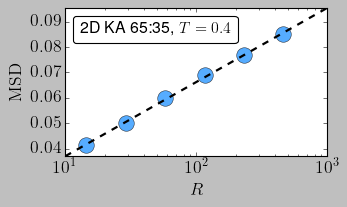

0.2672 0.015467141441453808


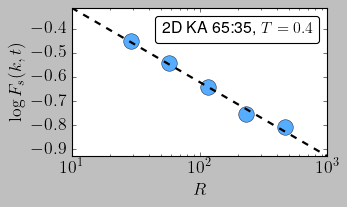

In [8]:
#Plotting Shiba et.al. data

for i in range(2):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(4.5,2.75))
    if i == 0:
        #MSD from Shiba, et.al.
        data = np.loadtxt("msd_prl.txt",skiprows=1)
        N = data[:,0]
        rho = 1.2#0.719
        R = (data[:,0]/rho)**0.5
        msd = 10**data[:,1]
        ax.semilogx(R,msd,'o',label="2D KA 65:35, $T=0.4$",alpha=0.75,color=blue(),markersize=14)
        
        
        #Linear fit to obtain compute the exponent \sigma(k,T) from MSD
        popt, pcov = curve_fit(lin,np.log(R),msd)
        print(2*np.pi**2*round(popt[0],4),2*pcov[0,0]**0.5)

        R = 10**np.linspace(1,3)
        ax.semilogx(R,lin(np.log(R),*popt),'k--', linewidth=2)
        ax.set_ylabel("$\mathrm{MSD}$",fontsize=16)
        ax.set_xlabel("$R$",fontsize=16)
        leg = ax.legend(loc=0,handlelength=0, handletextpad=0,fancybox=True)
        for item in leg.legendHandles:
            item.set_visible(False)
        ax.set_ylim(bottom=lin(np.log(R),*popt)[0],top=lin(np.log(R),*popt)[-1])
        ax.set_xlim(left=R[0],right=R[-1])
        ax.tick_params(axis='both', labelsize=16)
    else:
        #Fs(k,t) from Shiba, et.al.
        data = np.loadtxt("fskt_prl.txt",skiprows=1)
        N = data[:,0]
        rho = 1.2#0.719
        R = (data[:,0]/rho)**0.5
        fskt = data[:,1]
        ax.semilogx(R,np.log(fskt),'o',label="2D KA 65:35, $T=0.4$",alpha=0.75,color=blue(),markersize=14)

        #Linear fit to obtain compute the exponent \sigma(k,T) from Fs(k,t)
        popt, pcov = curve_fit(lin,np.log(R),np.log(fskt))
        print(-2*round(popt[0],4),2*pcov[0,0]**0.5)

        R = 10**np.linspace(1,3)
        ax.semilogx(R,lin(np.log(R),*popt),'k--', linewidth=2)
        ax.set_ylabel("$\log F_s(k,t)$",fontsize=16)
        ax.set_xlabel("$R$",fontsize=16)
        leg = ax.legend(loc=0,handlelength=0, handletextpad=0,fancybox=True)
        for item in leg.legendHandles:
            item.set_visible(False)
        ax.set_ylim(bottom=lin(np.log(R),*popt)[-1],top=lin(np.log(R),*popt)[0])
        ax.set_xlim(left=R[0],right=R[-1])
        ax.tick_params(axis='both', labelsize=16)

    plt.tight_layout()
    plt.show()
    plt.close()